In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
df = pd.read_csv("/Users/niko2485/Library/CloudStorage/OneDrive-UCB-O365/Desktop/EarthScienceCourse/Final project/output/heat_metrics_MarJun_38C.csv")
df.head()


,year,zone_index,zone_name,mean_tmax_MAMJ,p95_tmax_MAMJ,hot_days_ge_38C,onset_doy_ge_38C
0,1980,0,Andaman & Nicobar,29.485012,30.785149,0,NaN
1,1980,1,Andhra Pradesh,36.602806,41.371344,49,83.0
2,1980,2,Assam,28.479902,31.295429,0,NaN
3,1980,3,Chandigarh,34.445499,40.890350,42,110.0
4,1980,4,Dadra and Nagar Haveli,34.332851,38.512435,13,87.0


In [3]:
df.describe()
df['zone_name'].unique()


array(['Andaman & Nicobar', 'Andhra Pradesh', 'Assam', 'Chandigarh',
       'Dadra and Nagar Haveli', 'Delhi', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Kerala', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Karnataka', 'Nagaland', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Tripura',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Mizoram',
       'Daman and Diu', 'Goa', 'Bihar', 'Madhya Pradesh', 'Uttar Pradesh'],
      dtype=object)

In [4]:
df.hvplot.line(
    x="year", y="mean_tmax_MAMJ", groupby="zone_name",
    width=700, height=400, title="Mean Tmax (Mar–Jun) by Zone (Interactive)"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'9c357822-d740-4a8c-a015-07371592ac62': {'version…

In [10]:
df.hvplot.line(
    x="year", y="p95_tmax_MAMJ", groupby="zone_name",
    width=700, height=400, title="95th Percentile Tmax (Mar–Jun)"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'03ba713d-b7bd-403d-89fa-636ee561c74e': {'version…

In [6]:
df.hvplot.line(
    x="year", y="hot_days_ge_38C", groupby="zone_name",
    width=700, height=400, title="Hot Days ≥38°C"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'09cfda27-9ad1-45b5-ae5f-ad2be043065c': {'version…

In [7]:
df.hvplot.line(
    x="year", y="onset_doy_ge_38C", groupby="zone_name",
    width=700, height=400, title="Onset DOY of Extreme Heat"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'fd2f600a-aaaf-403e-ba22-0cd9890d7188': {'version…

In [8]:
df.groupby("zone_name")["mean_tmax_MAMJ"].mean().sort_values()
df.groupby("zone_name")["hot_days_ge_38C"].mean().sort_values()
df.groupby("zone_name")["onset_doy_ge_38C"].mean().sort_values()

zone_name
Dadra and Nagar Haveli     86.545455
Gujarat                    90.500000
Maharashtra                93.136364
Goa                        96.000000
Madhya Pradesh             96.363636
Rajasthan                  96.909091
Andhra Pradesh             97.181818
Daman and Diu              99.232558
Orissa                     99.767442
Bihar                     103.818182
Delhi                     104.750000
Haryana                   105.977273
Tripura                   106.000000
West Bengal               108.629630
Karnataka                 111.750000
Punjab                    114.090909
Chandigarh                114.113636
Tamil Nadu                115.464286
Uttar Pradesh             132.833333
Pondicherry               147.000000
Andaman & Nicobar                NaN
Arunachal Pradesh                NaN
Assam                            NaN
Himachal Pradesh                 NaN
Jammu and Kashmir                NaN
Kerala                           NaN
Manipur                     

In [9]:
import numpy as np

trend_summary = []

for z in df.zone_name.unique():
    sub = df[df.zone_name == z]
    slope = np.polyfit(sub['year'], sub['mean_tmax_MAMJ'], 1)[0]
    trend_summary.append((z, slope))

pd.DataFrame(trend_summary, columns=["zone", "trend_degC_per_year"])


,zone,trend_degC_per_year
0,Andaman & Nicobar,0.006448
1,Andhra Pradesh,-0.012817
2,Assam,0.007221
3,Chandigarh,0.010267
4,Dadra and Nagar Haveli,0.011518
5,Delhi,-0.007322
6,Gujarat,0.004501
7,Haryana,0.003390
8,Himachal Pradesh,0.020166
9,Jammu and Kashmir,0.029152


All-India trends (per year / per decade):
                 slope_per_year  slope_per_decade
mean_tmax_MAMJ            0.004             0.039
p95_tmax_MAMJ            -0.005            -0.053
hot_days_ge_38C          -0.046            -0.455

Decadal averages:
        mean_tmax_MAMJ  p95_tmax_MAMJ  hot_days_ge_38C
decade                                                
1980             29.79          34.42            17.25
1990             29.57          34.25            15.33
2000             29.78          34.30            15.62
2010             29.89          34.24            16.95
2020             29.62          33.96            11.99

Top 3 zones with fastest increase in mean Tmax:
             zone_name          metric  slope_per_year  slope_per_decade
52   Jammu and Kashmir  mean_tmax_MAMJ        0.029152          0.291522
80             Mizoram  mean_tmax_MAMJ        0.026954          0.269541
112            Tripura  mean_tmax_MAMJ        0.025029          0.250287

Top 3 zones 

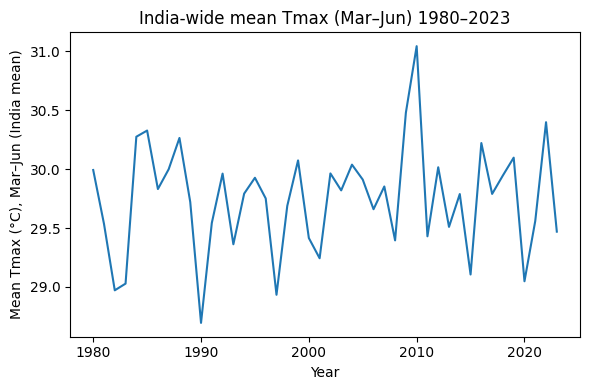

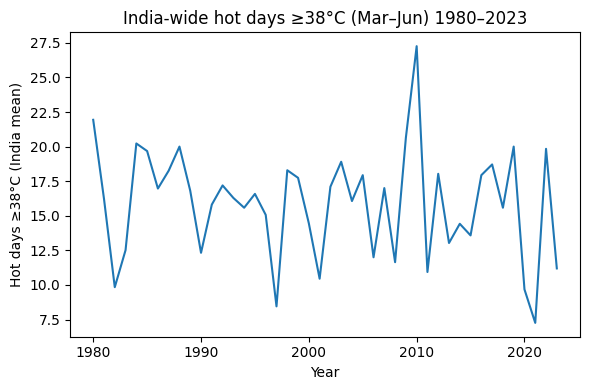

In [11]:
import numpy as np
import pandas as pd

# You already have df loaded:
# df = pd.read_csv(".../heat_metrics_MarJun_38C.csv")

# --------------------------------------------------
# 1. All-India average time series & trends
# --------------------------------------------------
country_ts = (
    df.groupby("year")[["mean_tmax_MAMJ", "p95_tmax_MAMJ", "hot_days_ge_38C"]]
      .mean()
      .reset_index()
)

# Linear trend (per year) for country-mean metrics
slopes = {}
for col in ["mean_tmax_MAMJ", "p95_tmax_MAMJ", "hot_days_ge_38C"]:
    m, b = np.polyfit(country_ts["year"], country_ts[col], 1)
    slopes[col] = {"slope_per_year": m, "slope_per_decade": m * 10}

slopes_df = pd.DataFrame(slopes).T
print("All-India trends (per year / per decade):")
print(slopes_df.round(3))

# OPTIONAL: decadal means (nice for a sentence in the slide)
df["decade"] = (df["year"] // 10) * 10
decade_summary = (
    df.groupby("decade")[["mean_tmax_MAMJ", "p95_tmax_MAMJ", "hot_days_ge_38C"]]
      .mean()
      .round(2)
)
print("\nDecadal averages:")
print(decade_summary)

# --------------------------------------------------
# 2. Zone-level trends for all key metrics
# --------------------------------------------------
metrics = ["mean_tmax_MAMJ", "p95_tmax_MAMJ", "hot_days_ge_38C", "onset_doy_ge_38C"]
rows = []

for zone, sub in df.groupby("zone_name"):
    for var in metrics:
        m, b = np.polyfit(sub["year"], sub[var], 1)
        rows.append(
            {
                "zone_name": zone,
                "metric": var,
                "slope_per_year": m,
                "slope_per_decade": m * 10,
            }
        )

trend_zone = pd.DataFrame(rows)

# Hottest-warming zones (mean Tmax)
top_mean_warming = (
    trend_zone[trend_zone["metric"] == "mean_tmax_MAMJ"]
    .sort_values("slope_per_year", ascending=False)
    .head(3)
)
print("\nTop 3 zones with fastest increase in mean Tmax:")
print(top_mean_warming)

# Zones with strongest increase in hot days ≥38°C
top_hotday_warming = (
    trend_zone[trend_zone["metric"] == "hot_days_ge_38C"]
    .sort_values("slope_per_year", ascending=False)
    .head(3)
)
print("\nTop 3 zones with fastest increase in hot days ≥38°C:")
print(top_hotday_warming)

# Zones where extreme heat starts earlier (negative slope in onset DOY)
earlier_onset = (
    trend_zone[trend_zone["metric"] == "onset_doy_ge_38C"]
    .sort_values("slope_per_year")  # more negative = earlier in the year
    .head(3)
)
print("\nTop 3 zones where extreme heat is arriving earlier (earliest onset trend):")
print(earlier_onset)

# --------------------------------------------------
# 3. Quick static plots for your slides (optional)
# --------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(country_ts["year"], country_ts["mean_tmax_MAMJ"])
plt.xlabel("Year")
plt.ylabel("Mean Tmax (°C), Mar–Jun (India mean)")
plt.title("India-wide mean Tmax (Mar–Jun) 1980–2023")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(country_ts["year"], country_ts["hot_days_ge_38C"])
plt.xlabel("Year")
plt.ylabel("Hot days ≥38°C (India mean)")
plt.title("India-wide hot days ≥38°C (Mar–Jun) 1980–2023")
plt.tight_layout()
plt.show()


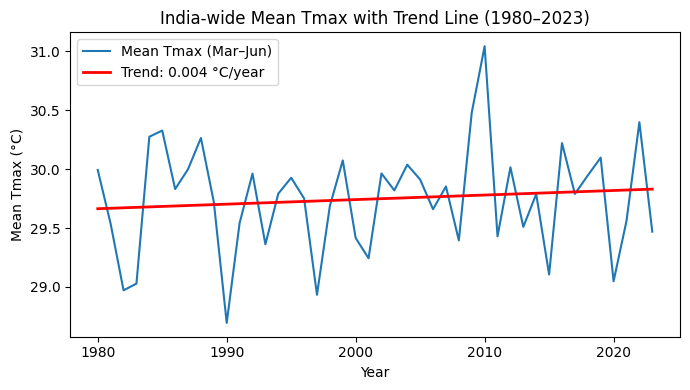

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the series you already computed
years = country_ts["year"]
vals = country_ts["mean_tmax_MAMJ"]

# Fit trend line
m, b = np.polyfit(years, vals, 1)
trend = m * years + b

plt.figure(figsize=(7,4))
plt.plot(years, vals, label="Mean Tmax (Mar–Jun)")
plt.plot(years, trend, color="red", linewidth=2, label=f"Trend: {m:.3f} °C/year")

plt.xlabel("Year")
plt.ylabel("Mean Tmax (°C)")
plt.title("India-wide Mean Tmax with Trend Line (1980–2023)")
plt.legend()
plt.tight_layout()
plt.show()


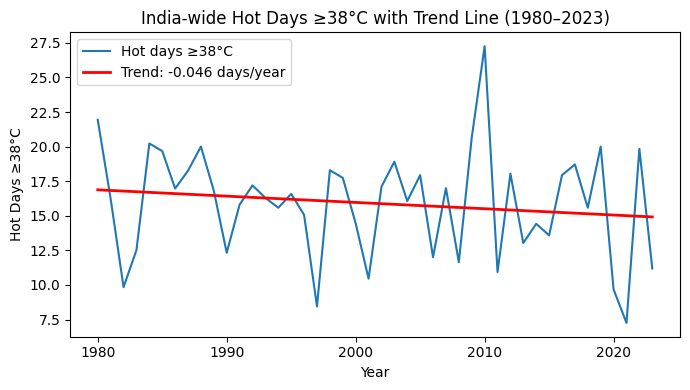

In [13]:
years = country_ts["year"]
vals = country_ts["hot_days_ge_38C"]

m, b = np.polyfit(years, vals, 1)
trend = m * years + b

plt.figure(figsize=(7,4))
plt.plot(years, vals, label="Hot days ≥38°C")
plt.plot(years, trend, color="red", linewidth=2, label=f"Trend: {m:.3f} days/year")

plt.xlabel("Year")
plt.ylabel("Hot Days ≥38°C")
plt.title("India-wide Hot Days ≥38°C with Trend Line (1980–2023)")
plt.legend()
plt.tight_layout()
plt.show()


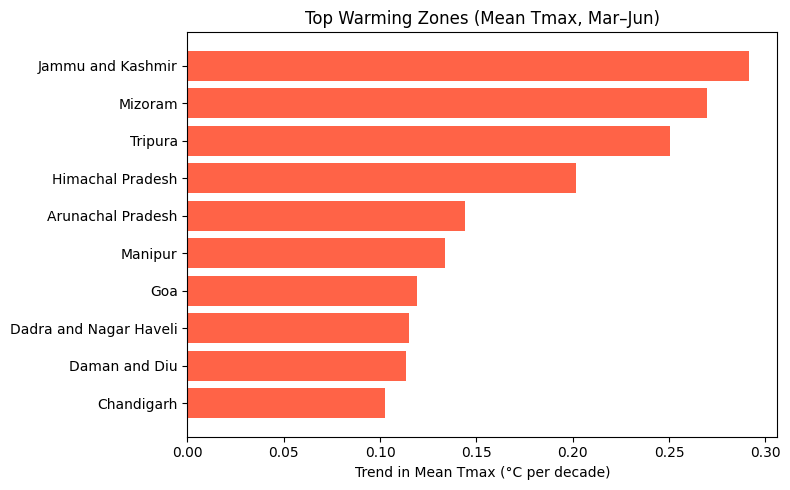

In [15]:
import matplotlib.pyplot as plt

# Filter slope table for mean Tmax
zone_slopes = trend_zone[trend_zone["metric"] == "mean_tmax_MAMJ"]

# Top 10 fastest warming zones
top_zones = zone_slopes.sort_values("slope_per_decade", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_zones["zone_name"], top_zones["slope_per_decade"], color="tomato")
plt.xlabel("Trend in Mean Tmax (°C per decade)")
plt.title("Top Warming Zones (Mean Tmax, Mar–Jun)")
plt.gca().invert_yaxis()  # so highest is at top
plt.tight_layout()
plt.show()


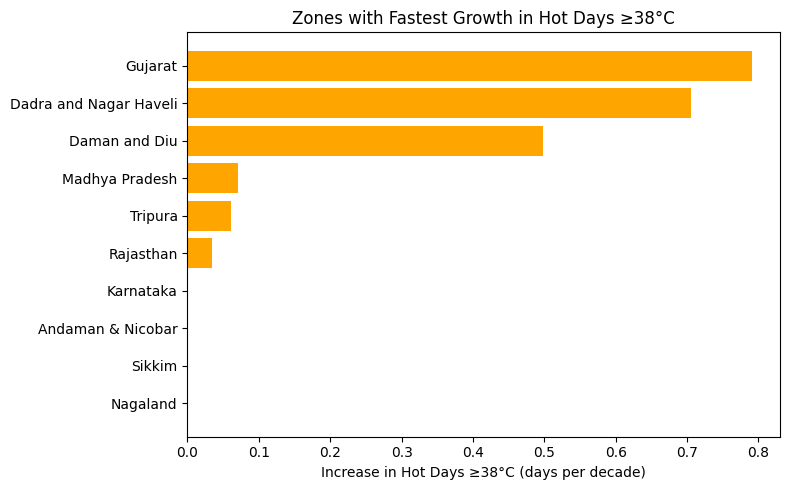

In [16]:
# Filter slope table for hot days ≥38°C
zone_slopes_hot = trend_zone[trend_zone["metric"] == "hot_days_ge_38C"]

# Top 10 zones increasing in hot days
top_hot = zone_slopes_hot.sort_values("slope_per_decade", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_hot["zone_name"], top_hot["slope_per_decade"], color="orange")
plt.xlabel("Increase in Hot Days ≥38°C (days per decade)")
plt.title("Zones with Fastest Growth in Hot Days ≥38°C")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [17]:
df.hvplot.line(
    x="year", y="mean_tmax_MAMJ", groupby="zone_name",
    width=700, height=450,
    title="Regional Trends in Mean Tmax (Mar–Jun, 1980–2023)"
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'25a5fbf6-1fdd-49ac-a861-00b62bd4032e': {'version…

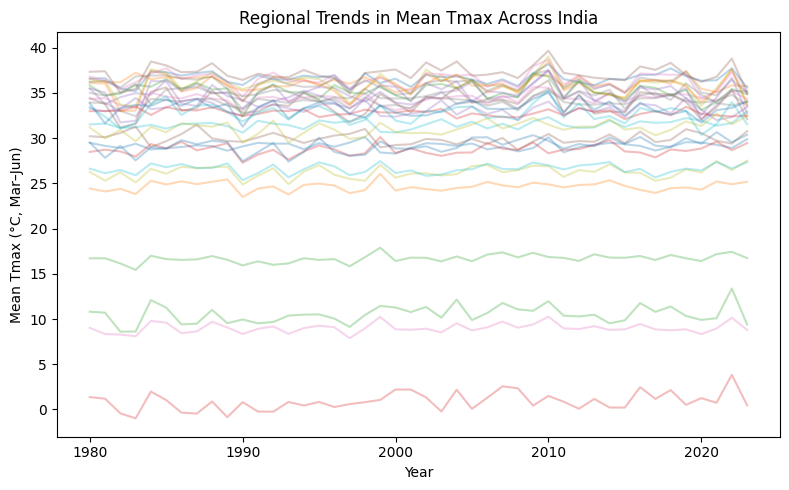

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for zone, sub in df.groupby("zone_name"):
    plt.plot(sub["year"], sub["mean_tmax_MAMJ"], alpha=0.3)

plt.xlabel("Year")
plt.ylabel("Mean Tmax (°C, Mar–Jun)")
plt.title("Regional Trends in Mean Tmax Across India")
plt.tight_layout()
plt.show()
